<a href="https://colab.research.google.com/github/Prasad3617/Image_Manipulations-PRACTICE-/blob/main/Week_1_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#Affine Transformations

## Function Definitions for Affine Transformations

In [ ]:
#definging the functions for performing affine transformations on input image

def read_image(image_path):
  image=cv2.imread(image_path)         #reads image in BGR format
  return image

In [ ]:
def display_image(read_image):
  cv2_imshow(read_image)
  cv2.waitKey(0)

In [ ]:
def save_image(image_name,image):
  cv2.imwrite(image_name,image)         #eaxample: image_1.jpg

In [51]:
def resize_image(image,dimensions,method_number):
  methods = [cv2.INTER_AREA,cv2.INTER_LINEAR,cv2.INTER_NEAREST,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
  resize_method = methods[method_number]
  resize_image = cv2.resize(image,dimensions, interpolation=resize_method)
  return resize_image

In [59]:
def crop_image(image,dimensions3):
  image_dimension = image.shape
  height_start, height_end, width_start, width_end = dimensions3
  height_dimensions=[height_start, height_end]
  width_dimensions=[width_start, width_end]
  np.clip(height_dimensions,a_min=0,a_max=image_dimension[0])
  np.clip(width_dimensions,a_min=0,a_max=image_dimension[1])
  cropped_image = image[height_dimensions[0]:height_dimensions[1],width_dimensions[0]:width_dimensions[1]]
  return cropped_image

In [66]:
def image_translation(image,dimension4):
  height_translation,width_translation=dimension4
  translation_matrix = np.float32([[1,0,width_translation],[0,1,height_translation]])
  translated_image=cv2.warpAffine(image,translation_matrix,(image.shape[1],image.shape[0]))
  return translated_image

In [70]:
def image_rotation(image,angle,scale):
  #cv2.getrotationmatrix2D cv2.warpAffine
  center=image.shape[1]/2,image.shape[0]/2
  rotation_matrix=cv2.getRotationMatrix2D(center,angle,scale)
  rotated_image=cv2.warpAffine(image,rotation_matrix,(image.shape[1],image.shape[0]))
  return rotated_image

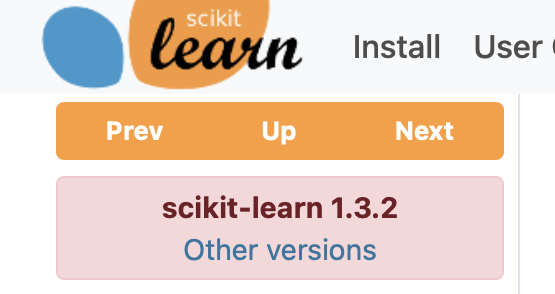

In [61]:
#driver function

image = read_image("/content/1.png")
display_image(image)

In [53]:
print(image.shape)

(294, 555, 3)


## Resizing the image

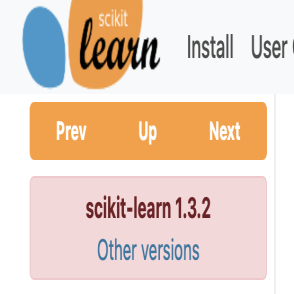

In [54]:
dimensions = (294,294)
method = 0
resized_image = resize_image(image,dimensions,method)
display_image(resized_image)              #resizing an image

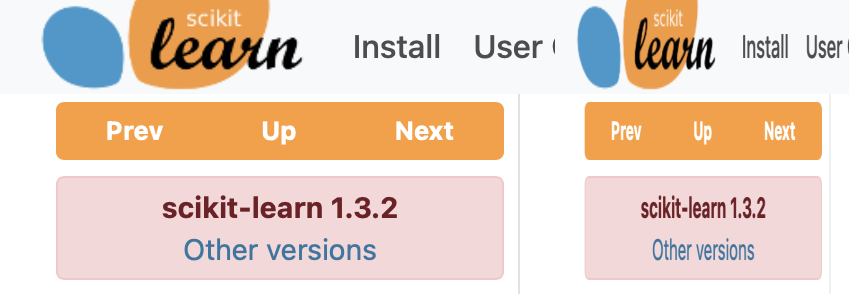

In [55]:
image2=np.hstack((image,resized_image))
display_image(image2)               #displaying the stacked images: original image and resized image

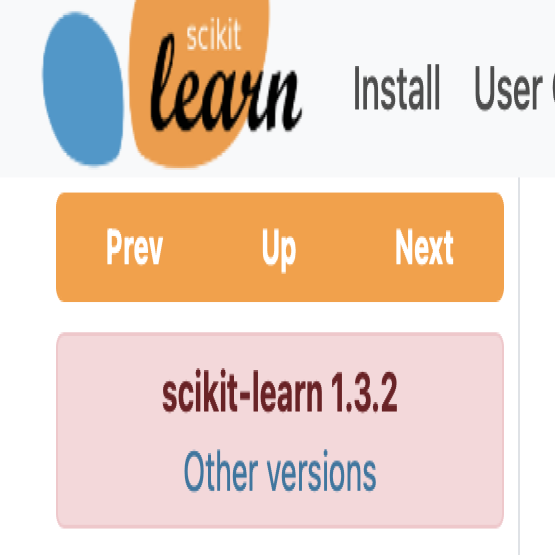

In [57]:
dimensions2 = (555,555)
method = 0
resized_image2 = resize_image(image,dimensions2,method)
display_image(resized_image2)          #displaying an enlarged image

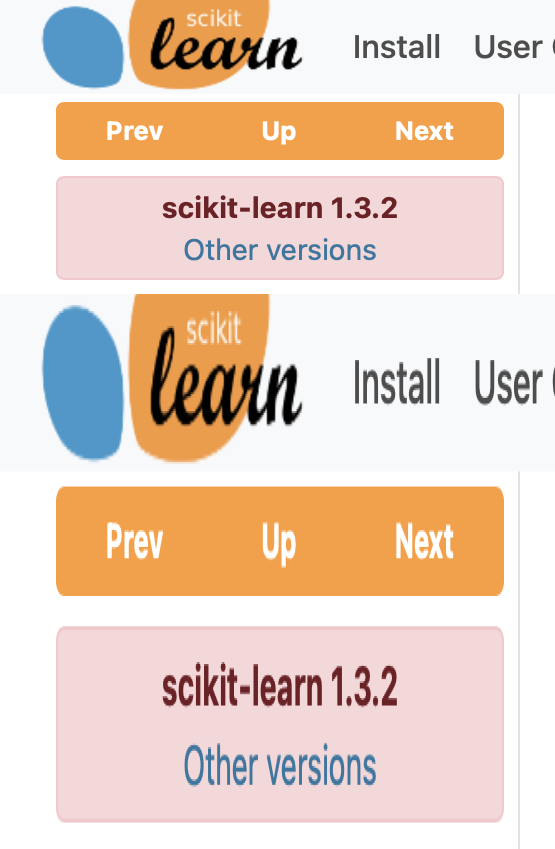

In [58]:
image3=np.vstack((image,resized_image2))
display_image(image3)               #displaying the stacked images: original image and enlarged image

## Cropping the image

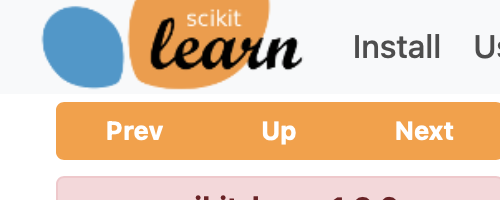

In [63]:
crop_dimensions = [0,200,0,500]
cropped_image=crop_image(image,crop_dimensions)
display_image(cropped_image)

## Translating the image

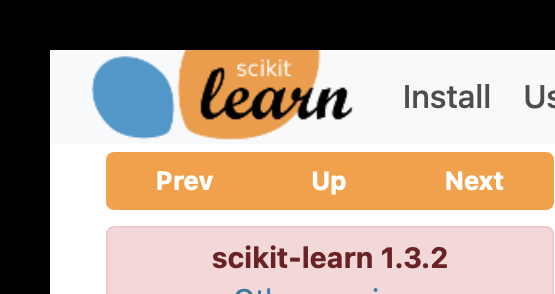

In [69]:
translation_dimensions = (50,50)
translated_image=image_translation(image,translation_dimensions)
display_image(translated_image)

## Rotating the Image

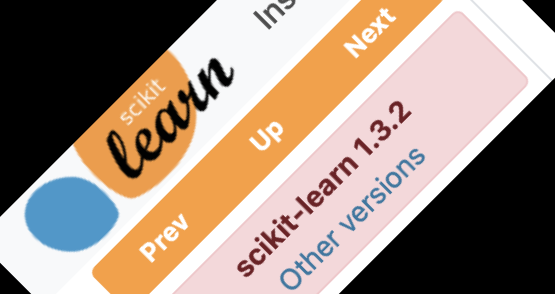

In [71]:
angle=45
scale=1
rotated_image=image_rotation(image,angle,scale)
display_image(rotated_image)